Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.feature_selection import RFE, f_regression
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split,  GridSearchCV
from xgboost import XGBClassifier, plot_tree, XGBRegressor
from sklearn import preprocessing
from sklearn.manifold import TSNE
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN, SMOTETomek
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/shardulchavan/-PREDICTIVE-MODELING-FOR-PRUDENTIAL-LIFE-INSURANCE-ASSESSMENT-/main/train.csv')

In [3]:
target = df['Response']

In [4]:
df.shape
df.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,...,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,...,0,0,0,0,0,0,0,0,0,8


### Data Preprocessing

In [24]:
missing_values = df.isna().sum()
missing_values[missing_values>0]

Employment_Info_1         19
Employment_Info_4       6779
Employment_Info_6      10854
Insurance_History_5    25396
Family_Hist_2          28656
Family_Hist_3          34241
Family_Hist_4          19184
Family_Hist_5          41811
Medical_History_1       8889
Medical_History_10     58824
Medical_History_15     44596
Medical_History_24     55580
Medical_History_32     58274
dtype: int64

In [25]:
59381* 0.25

14845.25

In [26]:
## Dropping missing values >25%
## we will perform imputation on employment info 1,4 and 6, the rest of the columns are dropped out

In [27]:
df.drop(['Insurance_History_5', 'Family_Hist_2', 'Family_Hist_3',
       'Family_Hist_4', 'Family_Hist_5', 'Medical_History_1',
       'Medical_History_10', 'Medical_History_15', 'Medical_History_24',
       'Medical_History_32'], axis = 1, inplace = True)

In [28]:
print(df['Employment_Info_1'].mean())
print(df['Employment_Info_4'].mean())
print(df['Employment_Info_6'].mean())

0.07758209953084522
0.0062826743249304665
0.361468804001489


In [29]:
print(df['Employment_Info_1'].median())
print(df['Employment_Info_4'].median())
print(df['Employment_Info_6'].median())

0.06
0.0
0.25


In [30]:
df['Employment_Info_1'] = df['Employment_Info_1'].fillna(df['Employment_Info_1'].median())
df['Employment_Info_4'] = df['Employment_Info_1'].fillna(df['Employment_Info_4'].median())
df['Employment_Info_6'] = df['Employment_Info_1'].fillna(df['Employment_Info_6'].median())

In [31]:
missing_values = df.isna().sum()
missing_values[missing_values>0]

Series([], dtype: int64)

### Feature Selection

### Chisquare test for categorical variables

In [32]:
categorical_df = "Product_Info_1, Product_Info_2, Product_Info_3, Product_Info_5, Product_Info_6, Product_Info_7, Employment_Info_2, Employment_Info_3, Employment_Info_5, InsuredInfo_1, InsuredInfo_2, InsuredInfo_3, InsuredInfo_4, InsuredInfo_5, InsuredInfo_6, InsuredInfo_7, Insurance_History_1, Insurance_History_2, Insurance_History_3, Insurance_History_4, Insurance_History_7, Insurance_History_8, Insurance_History_9, Family_Hist_1, Medical_History_2, Medical_History_3, Medical_History_4, Medical_History_5, Medical_History_6, Medical_History_7, Medical_History_8, Medical_History_9, Medical_History_11, Medical_History_12, Medical_History_13, Medical_History_14, Medical_History_16, Medical_History_17, Medical_History_18, Medical_History_19, Medical_History_20, Medical_History_21, Medical_History_22, Medical_History_23, Medical_History_25, Medical_History_26, Medical_History_27, Medical_History_28, Medical_History_29, Medical_History_30, Medical_History_31, Medical_History_33, Medical_History_34, Medical_History_35, Medical_History_36, Medical_History_37, Medical_History_38, Medical_History_39, Medical_History_40, Medical_History_41".split(',')

In [33]:
for x in range(1,49):
    categorical_df.append('Medical_Keyword_' + str(x))

In [34]:
categorical_df = [x.strip() for x in categorical_df]

In [35]:
categorical_df = df[categorical_df]

In [36]:
categorical_lst = "Product_Info_1, Product_Info_2, Product_Info_3, Product_Info_5, Product_Info_6, Product_Info_7, Employment_Info_2, Employment_Info_3, Employment_Info_5, InsuredInfo_1, InsuredInfo_2, InsuredInfo_3, InsuredInfo_4, InsuredInfo_5, InsuredInfo_6, InsuredInfo_7, Insurance_History_1, Insurance_History_2, Insurance_History_3, Insurance_History_4, Insurance_History_7, Insurance_History_8, Insurance_History_9, Family_Hist_1, Medical_History_2, Medical_History_3, Medical_History_4, Medical_History_5, Medical_History_6, Medical_History_7, Medical_History_8, Medical_History_9, Medical_History_11, Medical_History_12, Medical_History_13, Medical_History_14, Medical_History_16, Medical_History_17, Medical_History_18, Medical_History_19, Medical_History_20, Medical_History_21, Medical_History_22, Medical_History_23, Medical_History_25, Medical_History_26, Medical_History_27, Medical_History_28, Medical_History_29, Medical_History_30, Medical_History_31, Medical_History_33, Medical_History_34, Medical_History_35, Medical_History_36, Medical_History_37, Medical_History_38, Medical_History_39, Medical_History_40, Medical_History_41".split(', ')
for x in range(1,49):
    categorical_lst.append('Medical_Keyword_' + str(x))
    
print(len(categorical_lst))
p_val = []
for x in range(len(categorical_lst)):
    data = pd.crosstab(df[categorical_lst[x]], df['Response'])
    data = np.array(data)
    p_val.append(stats.chi2_contingency(data)[1])


108


In [37]:
df_pval = pd.DataFrame({'Index' : categorical_lst, 'P_value' : p_val})

In [38]:
df_pval.shape

(108, 2)

In [39]:
rt = df_pval[df_pval['P_value']>0.05]

In [40]:
rt

,Index,P_value
91,Medical_Keyword_32,0.064642
104,Medical_Keyword_45,0.194523


In [41]:
df_pval = df_pval[df_pval['P_value']<0.05]


In [42]:
df_pval.shape

(106, 2)

In [43]:
categorical_columns = list(df_pval['Index'])


### Anova test for numerical variables

In [44]:
numerical_df = "Product_Info_4, Ins_Age, Ht, Wt, BMI, Employment_Info_1, Employment_Info_4, Employment_Info_6"

In [45]:
numerical_df = numerical_df.split(", ")

In [46]:
sk = SelectKBest(k = 'all')

In [47]:
numerical_df = df[numerical_df]

In [48]:
sk.fit_transform(numerical_df, df['Response'])

array([[0.07692308, 0.64179104, 0.58181818, ..., 0.028     , 0.028     ,
        0.028     ],
       [0.07692308, 0.05970149, 0.6       , ..., 0.        , 0.        ,
        0.        ],
       [0.07692308, 0.02985075, 0.74545454, ..., 0.03      , 0.03      ,
        0.03      ],
       ...,
       [0.07692308, 0.10447761, 0.74545454, ..., 0.035     , 0.035     ,
        0.035     ],
       [0.23076923, 0.50746269, 0.69090909, ..., 0.038     , 0.038     ,
        0.038     ],
       [0.07692308, 0.44776119, 0.78181818, ..., 0.123     , 0.123     ,
        0.123     ]])

In [49]:
numerical_lst = "Product_Info_4, Ins_Age, Ht, Wt, BMI, Employment_Info_1, Employment_Info_4, Employment_Info_6"
numerical_lst = numerical_lst.split(", ")

In [50]:
for i in range(len(sk.scores_)):
	print((numerical_lst[i], sk.scores_[i]))

('Product_Info_4', 443.9405428025889)
('Ins_Age', 649.4064114587577)
('Ht', 211.75235563616224)
('Wt', 2327.3449630558653)
('BMI', 2937.4685906906448)
('Employment_Info_1', 52.53508211204276)
('Employment_Info_4', 52.53508211204276)
('Employment_Info_6', 52.53508211204276)


In [51]:
# removed all the values <100
#According to annova
# numerical_lst = "Product_Info_4, Ins_Age, Ht, Wt, BMI" 

### Mutual Info test

In [52]:
sk = SelectKBest(k = 'all' , score_func = mutual_info_classif)

In [53]:
sk.fit_transform(numerical_df, df['Response'])

array([[0.07692308, 0.64179104, 0.58181818, ..., 0.028     , 0.028     ,
        0.028     ],
       [0.07692308, 0.05970149, 0.6       , ..., 0.        , 0.        ,
        0.        ],
       [0.07692308, 0.02985075, 0.74545454, ..., 0.03      , 0.03      ,
        0.03      ],
       ...,
       [0.07692308, 0.10447761, 0.74545454, ..., 0.035     , 0.035     ,
        0.035     ],
       [0.23076923, 0.50746269, 0.69090909, ..., 0.038     , 0.038     ,
        0.038     ],
       [0.07692308, 0.44776119, 0.78181818, ..., 0.123     , 0.123     ,
        0.123     ]])

In [54]:
for i in range(len(sk.scores_)):
	print((numerical_lst[i], sk.scores_[i]))

('Product_Info_4', 0.07061094492842912)
('Ins_Age', 0.037782182398490516)
('Ht', 0.01502563389747369)
('Wt', 0.15169517402467392)
('BMI', 0.22599412632477467)
('Employment_Info_1', 0.010699907966090993)
('Employment_Info_4', 0.014042761231055856)
('Employment_Info_6', 0.008104431362228937)


In [55]:
numerical_lst = ["Product_Info_4", "Ins_Age", "Ht", "Wt", "BMI"]

In [56]:
final_val = categorical_columns + numerical_lst

In [57]:
df = df[final_val]

In [58]:
df.shape

(59381, 111)

In [59]:
# df['target'] = target
df = df.join(pd.get_dummies(df['Product_Info_2']))
df.drop('Product_Info_2' , axis = 1, inplace= True)

### Data Visualization 

In [60]:
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(df) 

C:\Users\chava\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\chava\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 59381 samples in 0.037s...
[t-SNE] Computed neighbors for 59381 samples in 6.220s...
[t-SNE] Computed conditional probabilities for sample 1000 / 59381
[t-SNE] Computed conditional probabilities for sample 2000 / 59381
[t-SNE] Computed conditional probabilities for sample 3000 / 59381
[t-SNE] Computed conditional probabilities for sample 4000 / 59381
[t-SNE] Computed conditional probabilities for sample 5000 / 59381
[t-SNE] Computed conditional probabilities for sample 6000 / 59381
[t-SNE] Computed conditional probabilities for sample 7000 / 59381
[t-SNE] Computed conditional probabilities for sample 8000 / 59381
[t-SNE] Computed conditional probabilities for sample 9000 / 59381
[t-SNE] Computed conditional probabilities for sample 10000 / 59381
[t-SNE] Computed conditional probabilities for sample 11000 / 59381
[t-SNE] Computed conditional probabilities for sample 12000 / 59381
[t-SNE] Computed conditional probabilities for sam

[Text(0.5, 1.0, 'Prudential data')]

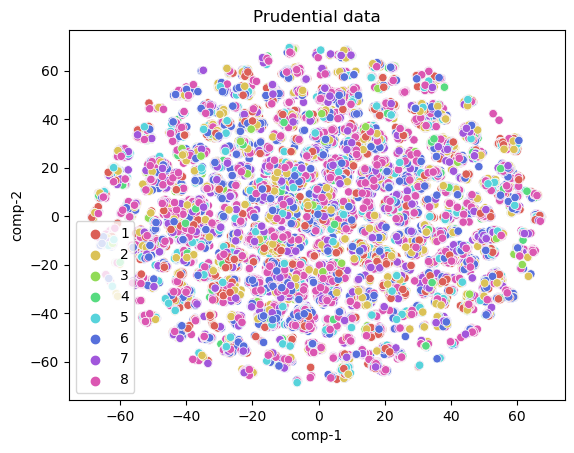

In [61]:
df["y"] = target
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 8),
                data=df).set(title="Prudential data")

C:\Users\chava\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Response', ylabel='count'>

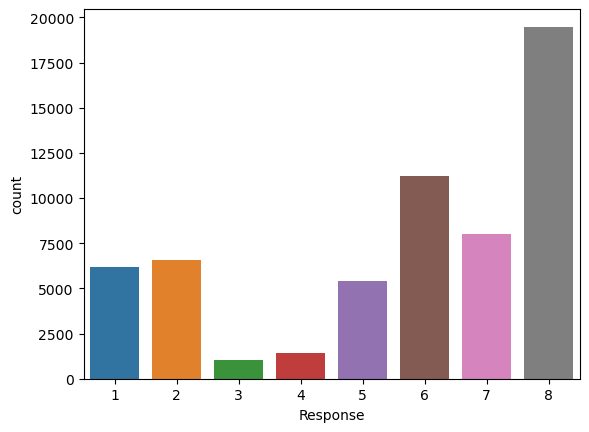

In [62]:
sns.countplot(target)

<AxesSubplot:xlabel='Response', ylabel='BMI'>

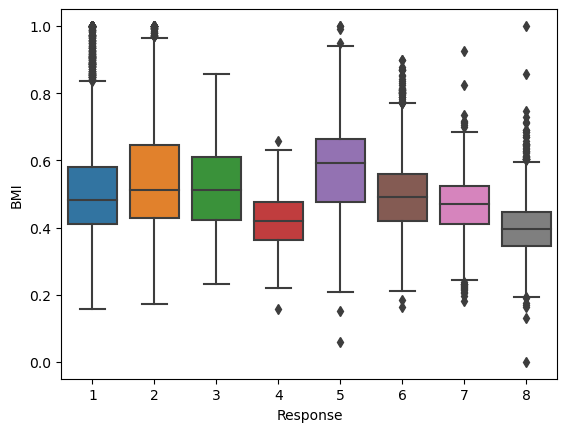

In [63]:
sns.boxplot(data=df, x= target, y='BMI')


<AxesSubplot:xlabel='Response', ylabel='Wt'>

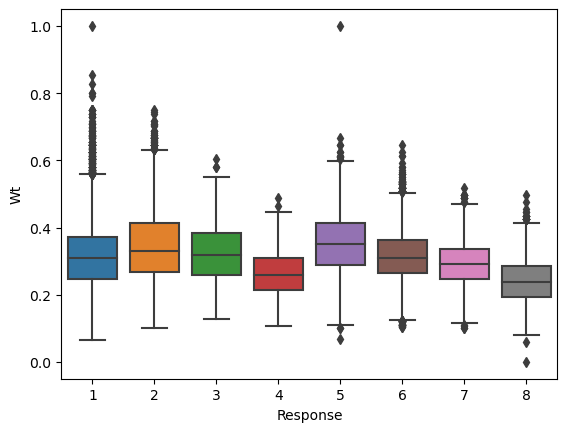

In [64]:
sns.boxplot(data=df, x= target, y='Wt')

### Data Sampling

In [65]:
# sampled_df = pd.DataFrame()
    
# for y in range(5000):
#     sampled_df = pd.concat([sampled_df, df[df['target'] == 1].sample()])
#     sampled_df = pd.concat([sampled_df, df[df['target'] == 2].sample()])
#     sampled_df = pd.concat([sampled_df, df[df['target'] == 3].sample()])
#     sampled_df = pd.concat([sampled_df, df[df['target'] == 4].sample()])
#     sampled_df = pd.concat([sampled_df, df[df['target'] == 5].sample()])
#     sampled_df = pd.concat([sampled_df, df[df['target'] == 6].sample()])
#     sampled_df = pd.concat([sampled_df, df[df['target'] == 7].sample()])
#     sampled_df = pd.concat([sampled_df, df[df['target'] == 8].sample()])

In [66]:
# sampled_df

#### Encoding of Data

In [67]:
cat_col = "Product_Info_1, Product_Info_3, Product_Info_5, Product_Info_6, Product_Info_7, Employment_Info_2, Employment_Info_3, Employment_Info_5, InsuredInfo_1, InsuredInfo_2, InsuredInfo_3, InsuredInfo_4, InsuredInfo_5, InsuredInfo_6, InsuredInfo_7, Insurance_History_1, Insurance_History_2, Insurance_History_3, Insurance_History_4, Insurance_History_7, Insurance_History_8, Insurance_History_9, Family_Hist_1, Medical_History_2, Medical_History_3, Medical_History_4, Medical_History_5, Medical_History_6, Medical_History_7, Medical_History_8, Medical_History_9, Medical_History_11, Medical_History_12, Medical_History_13, Medical_History_14, Medical_History_16, Medical_History_17, Medical_History_18, Medical_History_19, Medical_History_20, Medical_History_21, Medical_History_22, Medical_History_23, Medical_History_25, Medical_History_26, Medical_History_27, Medical_History_28, Medical_History_29, Medical_History_30, Medical_History_31, Medical_History_33, Medical_History_34, Medical_History_35, Medical_History_36, Medical_History_37, Medical_History_38, Medical_History_39, Medical_History_40, Medical_History_41"

In [68]:
cat_col = cat_col.split(", ")
len(cat_col)

59

In [69]:
for x in cat_col:
    df[x] = df[x].astype(str)

In [70]:
cat_df = pd.get_dummies(df[cat_col], drop_first=True)
cat_df.shape

(59381, 751)

In [78]:
num_col = [x for x in df.columns if x not in cat_col]
len(num_col)

70

In [79]:
num_df = df[num_col]
num_df.shape

(59381, 70)

In [80]:
one_hot_df = cat_df.join(num_df)

In [81]:
one_hot_df

,Product_Info_1_2,Product_Info_3_10,Product_Info_3_11,Product_Info_3_12,Product_Info_3_13,Product_Info_3_15,Product_Info_3_16,Product_Info_3_17,Product_Info_3_18,Product_Info_3_19,...,B2,C1,C2,C3,C4,D1,D2,D3,D4,E1
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59376,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
59377,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
59378,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
59379,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [82]:
col = df.select_dtypes(object).columns

for x in col:
    df[x] = pd.to_numeric(df[x])
    

In [83]:
# df.drop('target', axis = 1, inplace= True)

### Model Building

In [ ]:
df.drop(['y', 'comp-1', 'comp-2'], axis = 1, inplace = True)

In [ ]:
one_hot_df.drop(['y', 'comp-1', 'comp-2'], axis = 1, inplace = True)

In [86]:
neigh = KNeighborsClassifier(n_neighbors=3)
rf = RandomForestClassifier(class_weight = 'balanced')
model = XGBClassifier(class_weight = 'balanced')
# svm = SVC(gamma=10)

In [112]:
X = df
y = target
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size= 0.20, random_state= 10)

In [114]:
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_train)
print(metrics.classification_report(y_pred, y_train))

              precision    recall  f1-score   support

           0       0.79      0.51      0.62      7756
           1       0.65      0.51      0.57      6626
           2       0.46      0.40      0.43       916
           3       0.51      0.39      0.44      1508
           4       0.47      0.48      0.47      4214
           5       0.49      0.62      0.55      7156
           6       0.33      0.70      0.45      3068
           7       0.76      0.73      0.74     16260

    accuracy                           0.60     47504
   macro avg       0.56      0.54      0.53     47504
weighted avg       0.64      0.60      0.61     47504



In [115]:
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
print(metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.27      0.19      0.22      1705
           1       0.17      0.15      0.16      1472
           2       0.07      0.06      0.06       253
           3       0.09      0.06      0.07       423
           4       0.12      0.12      0.12      1132
           5       0.19      0.25      0.22      1749
           6       0.09      0.20      0.13       739
           7       0.54      0.48      0.51      4404

    accuracy                           0.29     11877
   macro avg       0.19      0.19      0.19     11877
weighted avg       0.31      0.29      0.30     11877



In [116]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_train)
print(metrics.classification_report(y_pred, y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4995
           1       1.00      1.00      1.00      5279
           2       1.00      1.00      1.00       804
           3       1.00      1.00      1.00      1151
           4       1.00      1.00      1.00      4323
           5       1.00      1.00      1.00      8955
           6       1.00      1.00      1.00      6409
           7       1.00      1.00      1.00     15588

    accuracy                           1.00     47504
   macro avg       1.00      1.00      1.00     47504
weighted avg       1.00      1.00      1.00     47504



In [117]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.18      0.39      0.24       557
           1       0.25      0.43      0.32       751
           2       0.05      0.50      0.09        20
           3       0.06      0.41      0.11        41
           4       0.48      0.52      0.50      1017
           5       0.50      0.41      0.45      2802
           6       0.33      0.45      0.38      1162
           7       0.89      0.63      0.74      5527

    accuracy                           0.53     11877
   macro avg       0.34      0.47      0.35     11877
weighted avg       0.63      0.53      0.56     11877



In [ ]:
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
print(metrics.classification_report(y_pred, y_train))

In [ ]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(metrics.classification_report(y_pred, y_test))

In [ ]:
regressor = XGBRegressor()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_train)
y_pred = [round(x) for x in y_pred]
print(metrics.classification_report(y_pred, y_train))

regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
y_pred = [round(x) for x in y_pred]
print(metrics.classification_report(y_pred, y_test))

In [ ]:
### One hot

In [ ]:
X = one_hot_df
y = target
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size= 0.20, random_state= 10)

In [95]:
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_train)
print(metrics.classification_report(y_pred, y_train))

neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
print(metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.78      0.54      0.64      7211
           1       0.65      0.55      0.59      6256
           2       0.55      0.44      0.49      1010
           3       0.50      0.40      0.44      1439
           4       0.50      0.53      0.52      4096
           5       0.53      0.63      0.57      7525
           6       0.37      0.70      0.48      3354
           7       0.80      0.75      0.77     16613

    accuracy                           0.63     47504
   macro avg       0.58      0.57      0.56     47504
weighted avg       0.66      0.63      0.64     47504

              precision    recall  f1-score   support

           0       0.23      0.19      0.20      1465
           1       0.18      0.16      0.17      1366
           2       0.09      0.07      0.08       244
           3       0.11      0.08      0.09       375
           4       0.15      0.15      0.15      1089
           5       0.23 

In [96]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_train)
print(metrics.classification_report(y_pred, y_train))

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4997
           1       1.00      1.00      1.00      5279
           2       1.00      1.00      1.00       804
           3       1.00      1.00      1.00      1151
           4       1.00      1.00      1.00      4323
           5       1.00      1.00      1.00      8953
           6       1.00      1.00      1.00      6409
           7       1.00      1.00      1.00     15588

    accuracy                           1.00     47504
   macro avg       1.00      1.00      1.00     47504
weighted avg       1.00      1.00      1.00     47504

              precision    recall  f1-score   support

           0       0.18      0.40      0.24       536
           1       0.23      0.41      0.29       721
           2       0.05      0.83      0.09        12
           3       0.03      0.50      0.05        14
           4       0.45      0.52      0.48       962
           5       0.48 

In [97]:
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
print(metrics.classification_report(y_pred, y_train))

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(metrics.classification_report(y_pred, y_test))

[13:43:21] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


              precision    recall  f1-score   support

           0       0.47      0.78      0.58      3022
           1       0.46      0.72      0.56      3365
           2       0.44      0.89      0.59       400
           3       0.41      0.66      0.50       718
           4       0.63      0.72      0.67      3768
           5       0.61      0.53      0.57     10373
           6       0.47      0.58      0.52      5187
           7       0.92      0.69      0.79     20671

    accuracy                           0.65     47504
   macro avg       0.55      0.70    

In [104]:
regressor = XGBRegressor()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_train)
y_pred = [round(x) for x in y_pred]
print(metrics.classification_report(y_pred, y_train))

regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
y_pred = [round(x) for x in y_pred]
print(metrics.classification_report(y_pred, y_test))

C:\Users\dkdha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dkdha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dkdha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          -2       0.00      0.00      0.00         8
          -1       0.00      0.00      0.00        73
           0       0.09      0.73      0.16       603
           1       0.16      0.47      0.24      1790
           2       0.17      0.05      0.07      3025
           3       0.10      0.02      0.04      5287
           4       0.36      0.18      0.24      8865
           5       0.37      0.30      0.33     10953
           6       0.31      0.17      0.22     12042
           7       0.27      0.88      0.42      4857
           8       0.00      0.00      0.00         1

    accuracy                           0.27     47504
   macro avg       0.17      0.25      0.16     47504
weighted avg       0.29      0.27      0.24     47504

              precision    recall  f1-score   support

          -5       0.00      0.00      0.00         1
          -3       0.00      0.00      0.00         1
          -2       0.00 

C:\Users\dkdha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dkdha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dkdha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [129]:
models_df = pd.DataFrame({'Models':['Random Forest', 'KNN', 'XGBoost' ], 'Train_Score' :[100, 63, 65] , 'Test_Score' :[51,32,54]})
models_onehot_df = pd.DataFrame({'Models':['Random Forest', 'KNN', 'XGBoost' ], 'Train_Score' :[100, 60, 68] , 'Test_Score' :[53,29,54]})

C:\Users\dkdha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Train_Score', ylabel='Models'>

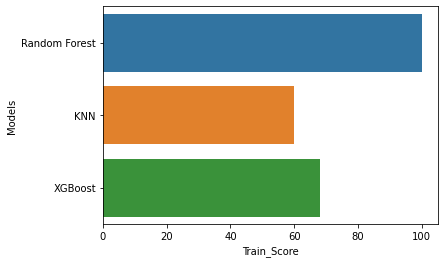

In [111]:
sns.barplot(models_df['Train_Score'], models_df['Models'])

C:\Users\dkdha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Test_Score', ylabel='Models'>

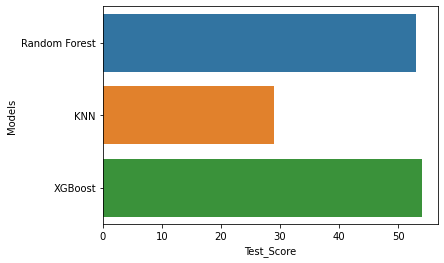

In [112]:
sns.barplot(models_df['Test_Score'], models_df['Models'])

C:\Users\dkdha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Train_Score', ylabel='Models'>

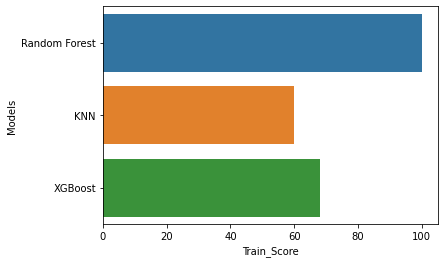

In [114]:
sns.barplot(models_onehot_df['Train_Score'], models_onehot_df['Models'])

C:\Users\dkdha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Test_Score', ylabel='Models'>

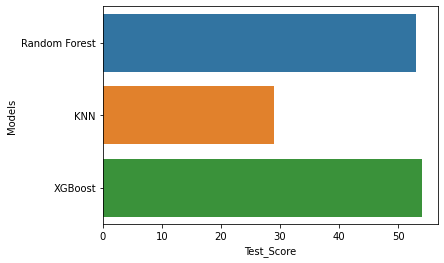

In [115]:
sns.barplot(models_onehot_df['Test_Score'], models_onehot_df['Models'])

In [116]:
xgb_df = pd.DataFrame({'Models':['XGB Regressor'], 'Train_Score' :[29] , 'Test_Score' :[26]})
xgb_onehot_df = pd.DataFrame({'Models':['XGB Regressor'], 'Train_Score' :[27] , 'Test_Score' :[25]})


Text(0.5, 1.0, 'Without Encoding')

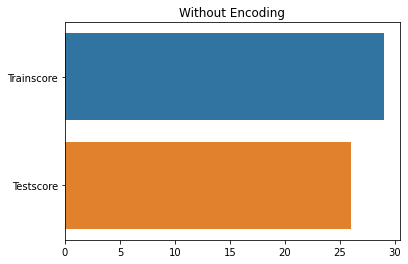

In [126]:
sns.barplot(x = [29,26], y = ['Trainscore', 'Testscore']).set_title("Without Encoding")

Text(0.5, 1.0, 'With Encoding')

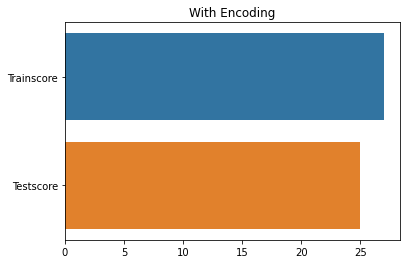

In [127]:
sns.barplot(x = [27,25], y = ['Trainscore', 'Testscore']).set_title("With Encoding")

### Gridsearch

In [3]:
clf = RandomForestClassifier()

In [8]:
X = df
y = target
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X,y , test_size= 0.20, random_state= 10)

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 350 candidates, totalling 1400 fits


In [90]:
n_estimators = [ 10,40, 80, 100]
max_depth =  [2, 5, 10,]
min_samples_leaf= [5,20, 50, 100]
criterion = ["gini", "entropy"]

In [91]:
trainscore = []
testscore = []
lst = []

In [92]:
from sklearn.metrics import accuracy_score

In [95]:
for x in n_estimators:
    for y in max_depth:
        for z in min_samples_leaf:
            for a in criterion:
                model = RandomForestClassifier(criterion= a, min_samples_leaf=z, max_depth = y,
                                                          n_estimators = x)
                lst.append((x,y,z,a))
                
                model.fit(X_train, y_train)
                y_pred = model.predict(X_train)
                trainscore.append(accuracy_score(y_pred, y_train))
                
                model.fit(X_train, y_train)
                y_pred = model.predict(X_test)
                testscore.append(accuracy_score(y_pred, y_test))
                
    

In [100]:
diff = np.array(trainscore) - np.array(testscore)

In [104]:
list(diff).index(0.00010037308991767135)

83

In [105]:
trainscore[83]

0.44213118895250925

In [106]:
testscore[83]

0.4420308158625916

In [107]:
lst[83]

(100, 5, 20, 'entropy')